In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile  as wavfile
import winsound, os
# plotting 3D complex plane
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal

## 1. LTI Impulse response

#### a. 

The convolution equation is:
$$
y[n] = x[n] * h [n] = \sum_{k=-\infty}^{\infty}x[n]h[n-k]
$$
The application is that we can decompose a signal into a series of scaled and time-shifted impulses, we can deduce the output response by combining the impulse response of each of the impulses

#### b.

It will get change in phase and amplitude but not frequency

Eigenfunction is a function when passes through a system, the output is a scaled version of the input

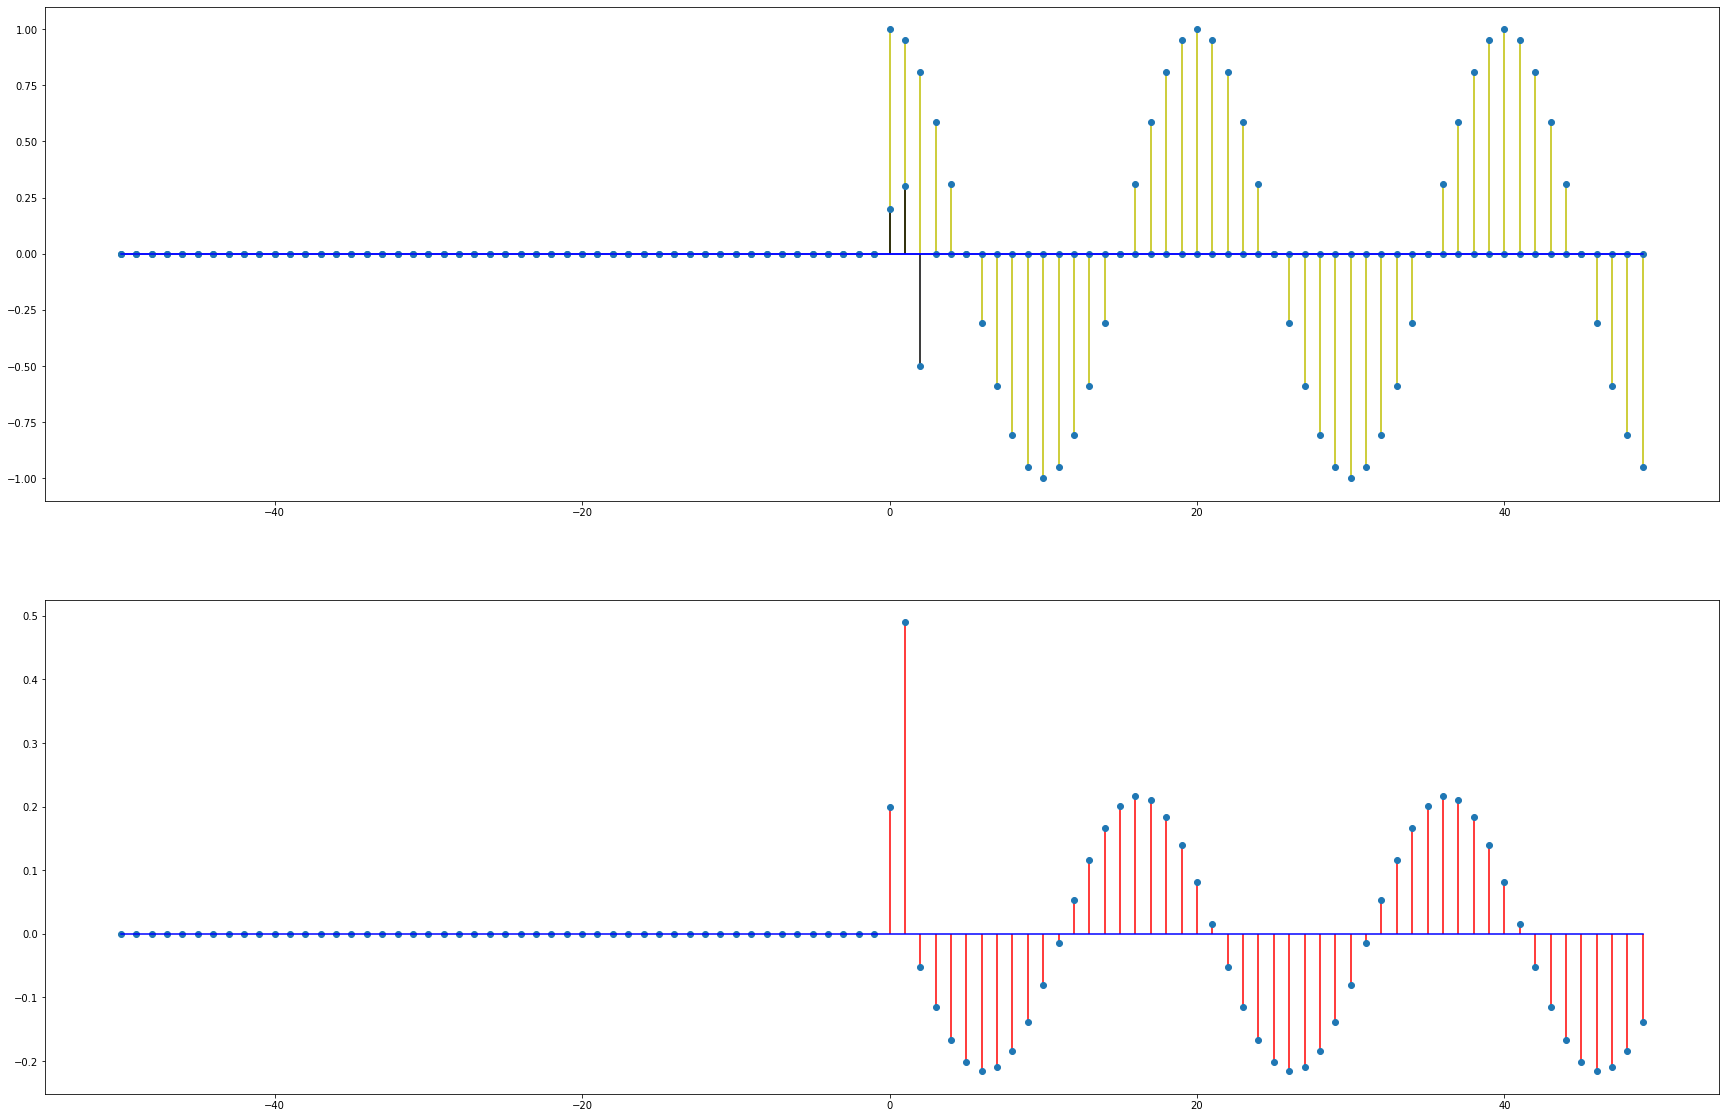

In [2]:
def q_1():
    n = np.arange(-50,50,1)
    temp = 1*np.cos(0.1*np.pi*n)
    x_n = np.array([i*(v//50) for v,i in enumerate(temp)])
    h_n = np.array([0 for _ in range(50)] + [0.2,0.3,-0.5] + [0 for _ in range(47)])
    y_n = np.convolve(x_n,h_n)

    plt.figure(1,figsize=(30,20))
    plt.subplot(211)
    plt.stem(n,x_n,use_line_collection=True,basefmt="b",linefmt='y')
    plt.stem(n,h_n,use_line_collection=True,basefmt="b",linefmt='k')
    plt.subplot(212)
    plt.stem(n,y_n[50:150],use_line_collection=True,basefmt="b",linefmt='r')
q_1()

## 2

The impulse response of an LTI can be obtained from the linear constant-coefficient difference equation in the case the particular solution $y_p= 0$, since for x(n) = 0 for n>0 for an impulse function. The same can be done via convolution of impulse with the transfer function of the LTI.

An example is a FIR filter -- raised cosine filter, or just truncate usingsome windows like hamming windows,hanning windows _cough in MFCC extraction_

## 3.

In [3]:
#Play the sound
input_wavfile = "helloWorld_16bit.wav"
winsound.PlaySound(input_wavfile, winsound.SND_FILENAME)

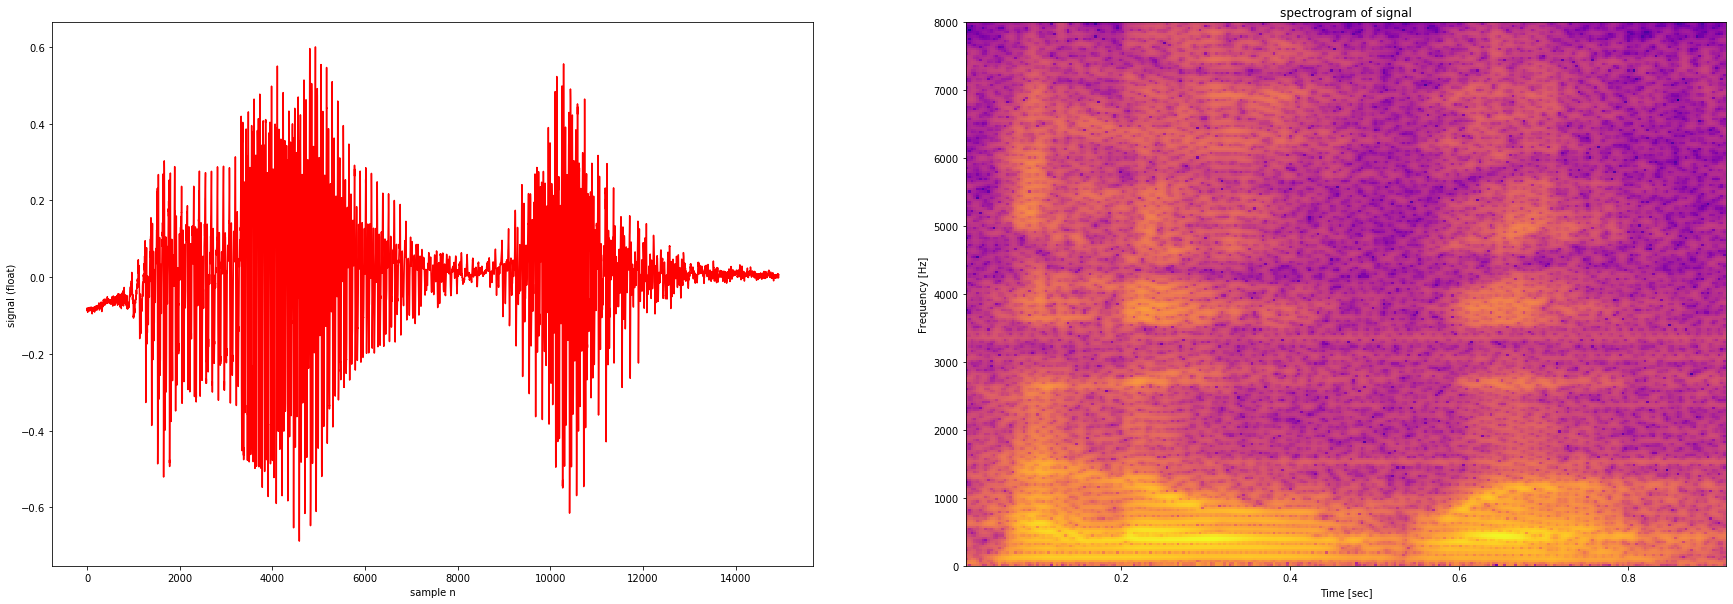

In [4]:
#Plot the signal
def extract_data_from_wav(input_wavfile):
    [Fs, sampleX_16bit] = wavfile.read(input_wavfile)
    sampleX_float = np.array([float(s/32767.0) for s in sampleX_16bit],dtype='float')
    sampleX_float = np.multiply(3.0,sampleX_float)
    return [Fs,sampleX_float]

def plot_signal_and_spec(input_wavfile):
    [Fs, sampleX_float ]= extract_data_from_wav(input_wavfile) 
    plt.figure(figsize=(30,10))
    plt.subplot(121)
    plt.plot(sampleX_float,'r')
    plt.ylabel('signal (float)')
    plt.xlabel('sample n')
    [f, t, Sxx_clean] = signal.spectrogram(sampleX_float, Fs, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
    plt.subplot(122)
    plt.pcolormesh(t, f, 10*np.log10(Sxx_clean),cmap='plasma')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('spectrogram of signal')
    plt.show()

    
#plot signal and spectogram
plot_signal_and_spec(input_wavfile)

In [5]:
#Define Impulse Reponse
impulseH = np.zeros(8000)
impulseH[1] = 1
impulseH[4000] = 3
impulseH[7900] = 5

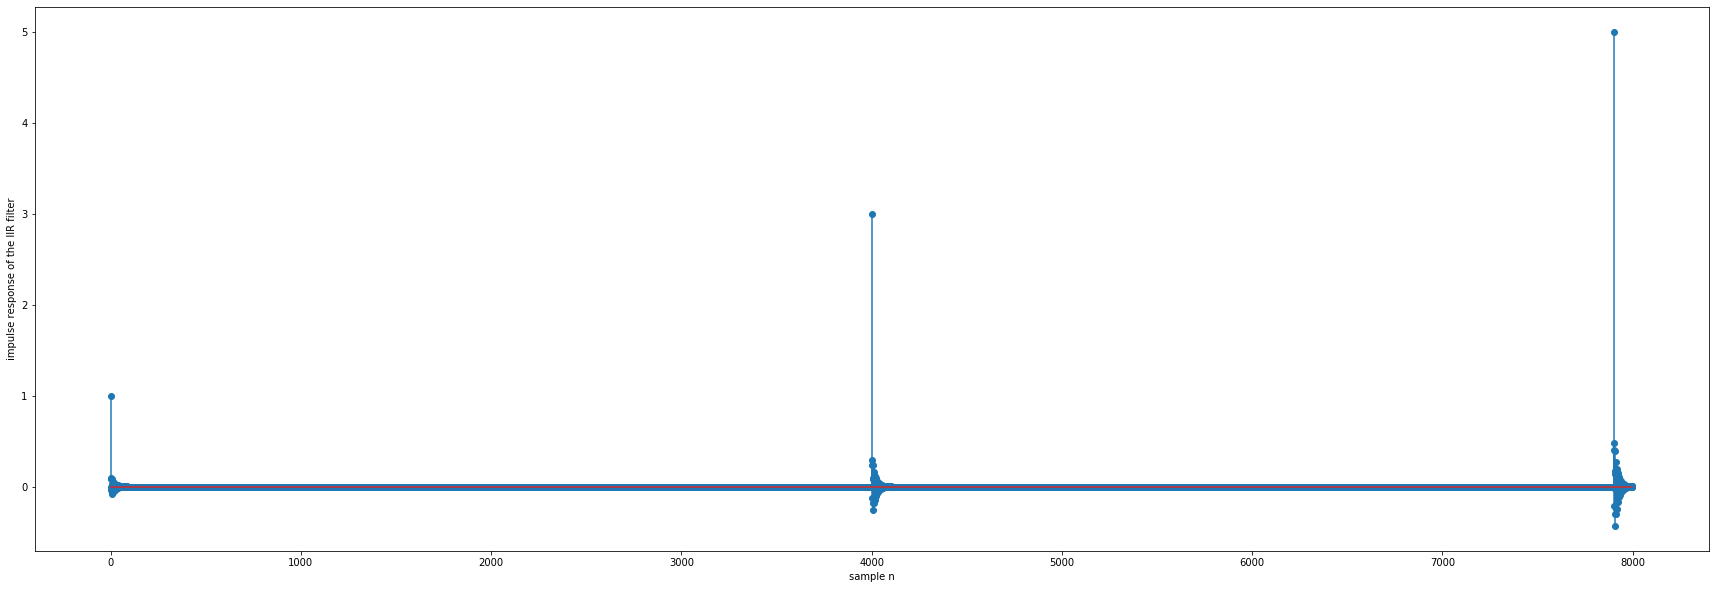

In [6]:
#Sketch impulse response
def plot_Impulse_Response(impulseH):
    numSamples = len(impulseH)
    n = np.arange(0,numSamples,1)
    num = [1, -0.7653668, 0.99999]
    den = [1, -0.722744, 0.888622]
    y = signal.lfilter(num, den, impulseH)
    plt.figure(2,figsize=(30,10))
    plt.stem(n, y,use_line_collection=True)
    plt.ylabel('impulse response of the IIR filter')
    plt.xlabel('sample n')
    plt.show()
plot_Impulse_Response(impulseH)

In [7]:
#Define your own convolution routine
def custom_convolve(x,y,mode='full'):
    """
    assume x bigger than y as array. Default to valid
    """
    result = []
    a, v = x,y
    if (len(v) > len(a)):    #swap the longer array to a
        a, v = v, a

    if mode == 'full':      #pad to a

        pad = np.array([0 for _ in range(len(v)-1)])
        b = np.copy(a)
        a = np.concatenate((pad,b,pad))
    for j in range(len(a)-len(v)+1):
        result.append((np.sum(np.matmul(v[::-1],a[j:j+len(v)]))))
    return np.array(result)

In [8]:
#Test your own function

test_x = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0])
test_h = np.array([0,1,2,0,0,3,4,0])
val_y =np.convolve(test_x,test_h)
pred_y=custom_convolve(test_x,test_h)
print("NP CONVOLVE",val_y)
print("CUSTOM FUNC",pred_y)

NP CONVOLVE [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
CUSTOM FUNC [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
#Play sound convolved
[Fs, sampleX_float] = extract_data_from_wav(input_wavfile)
y_n_rir = np.convolve(sampleX_float,impulseH)
def playSoundFromWav(y,Fs = 16000,filename='t1_16bit.wav'):
    y_16bit = np.array([int(s*32767) for s in y],dtype='int16')
    # Lets save the file, fname, sequence, and samplingrate needed
    wavfile.write(filename, Fs, y_16bit)
    # Lets play the wavefile using winsound given the wavefile saved above
    #unfortunately winsound ONLY likes u16 bit values
    #thats why we had to normalize y->y_norm (16 bits) integers to play using winsounds
    winsound.PlaySound(filename, winsound.SND_FILENAME)
    #cleanup
    os.remove(filename)

playSoundFromWav(y_n_rir)

In [10]:
def compare_two_spec(sig1,sig2,Fs=16000):

    [f, t, Sxx] = signal.spectrogram(sig1, Fs, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
    plt.figure(1,figsize=(30,10))
    plt.subplot(121)
    plt.pcolormesh(t, f, 10*np.log10(Sxx),cmap='plasma')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Spec1')

    [f2, t2, Sxx2] = signal.spectrogram(sig2, Fs, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
    plt.subplot(122)
    plt.pcolormesh(t2, f2, 10*np.log10(Sxx2),cmap='plasma')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Spec 2')

    plt.show()

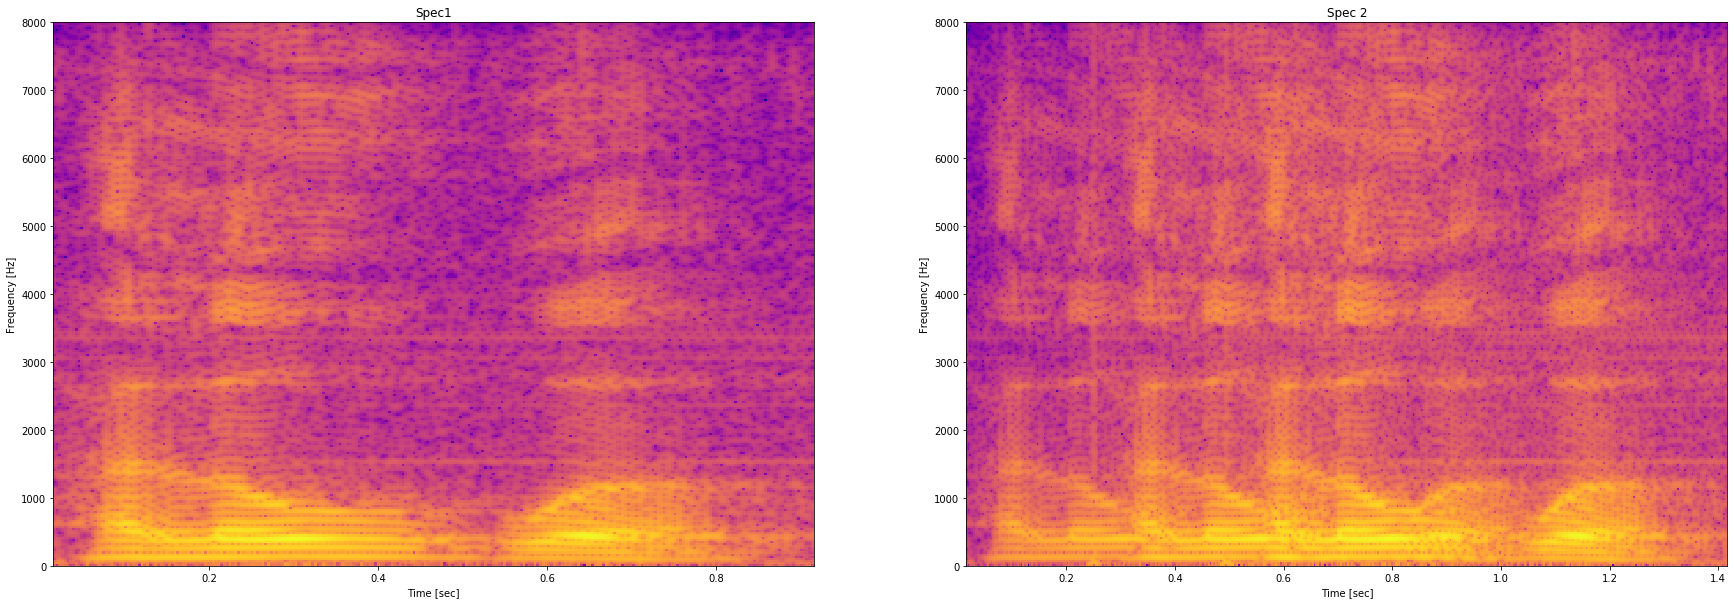

In [11]:
input3= "helloworld_16bit.wav"
[Fs_3, sampleX_float_3]= extract_data_from_wav(input3)
original_y=sampleX_float_3
convolved_y = np.convolve(impulseH,original_y)
compare_two_spec(original_y,convolved_y)
playSoundFromWav(original_y)
playSoundFromWav(convolved_y)

### DEMO

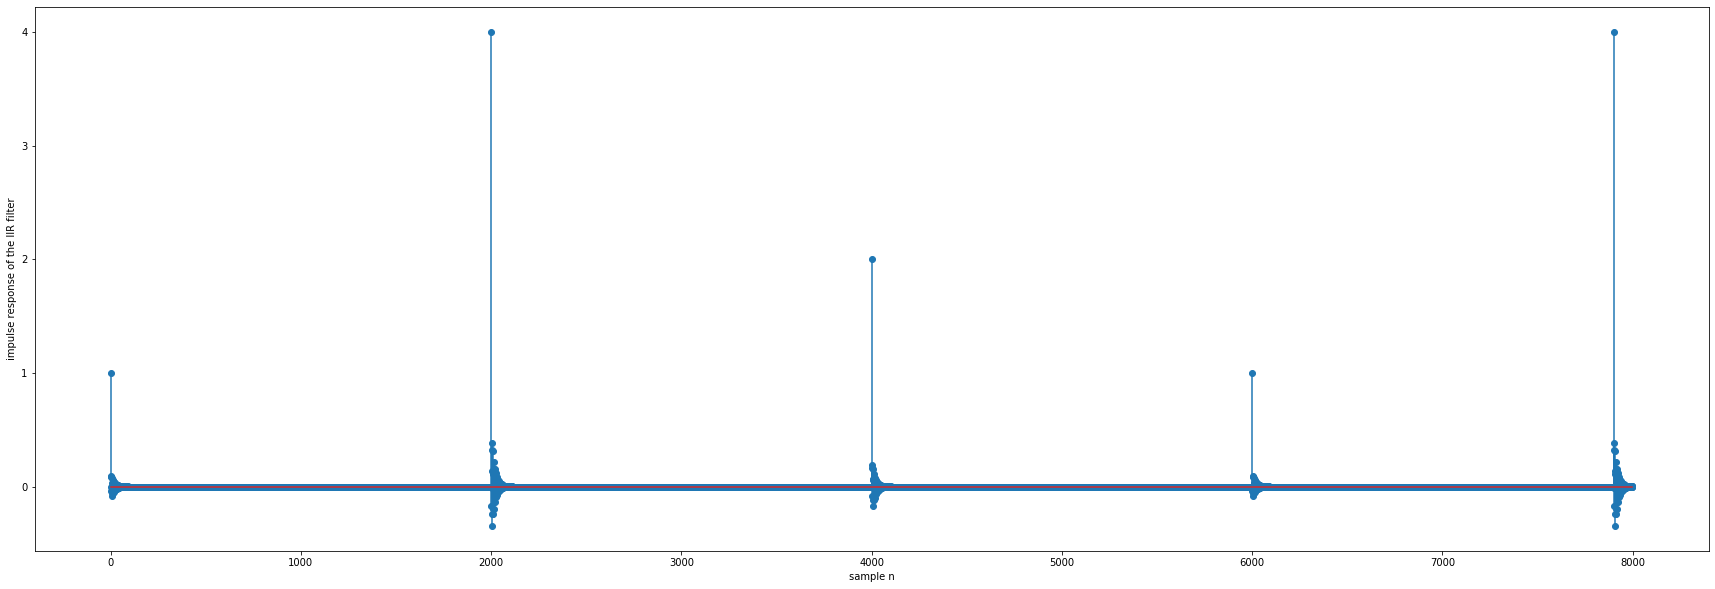

In [12]:
impulseH_1 = np.zeros(8000)
impulseH_1[1] = 1
impulseH_1[2000]= 4
impulseH_1[4000] = 2
impulseH_1[6000] =1
impulseH_1[7900] = 4
plot_Impulse_Response(impulseH_1)

In [13]:
def before_after(impulseH,input_signal):
    original_y=input_signal
    convolved_y = np.convolve(impulseH,original_y)
    compare_two_spec(original_y,convolved_y)
    playSoundFromWav(original_y)
    playSoundFromWav(convolved_y)

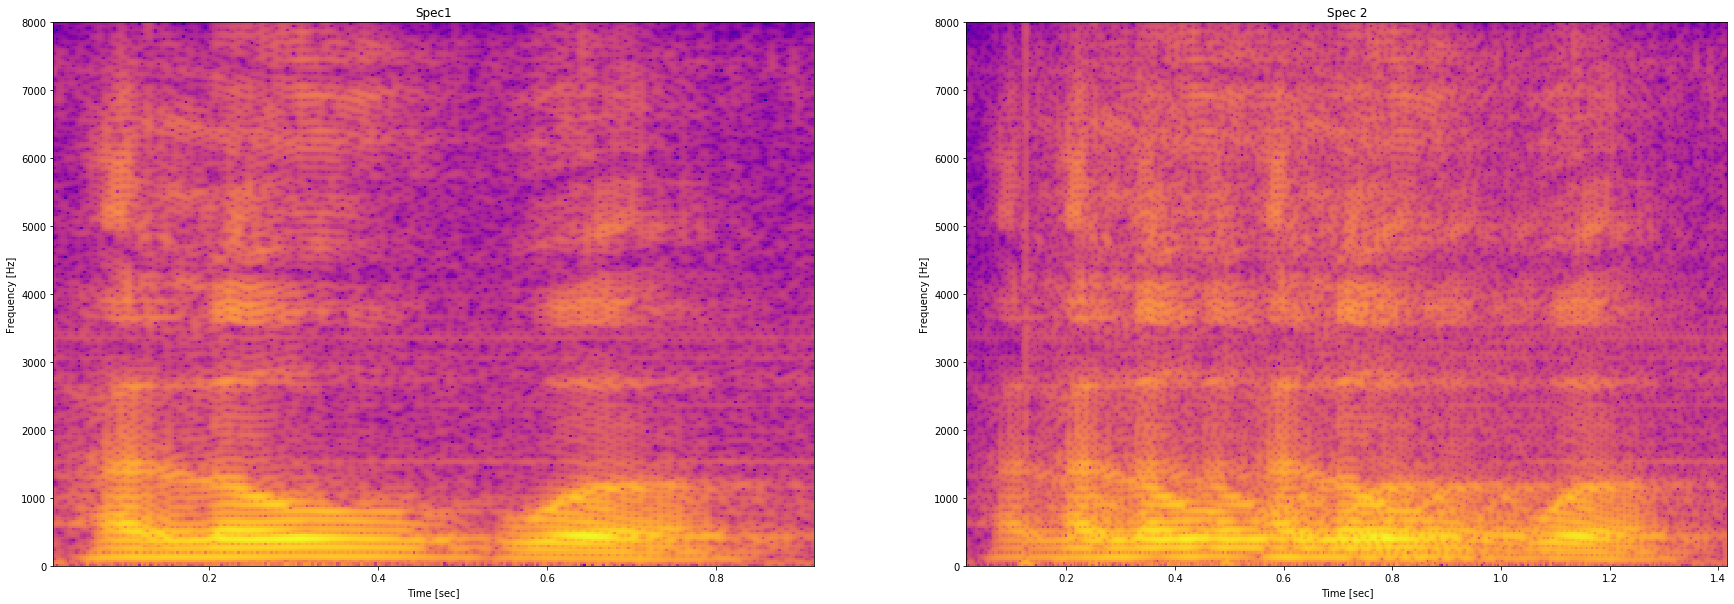

In [14]:
before_after(impulseH_1,original_y)

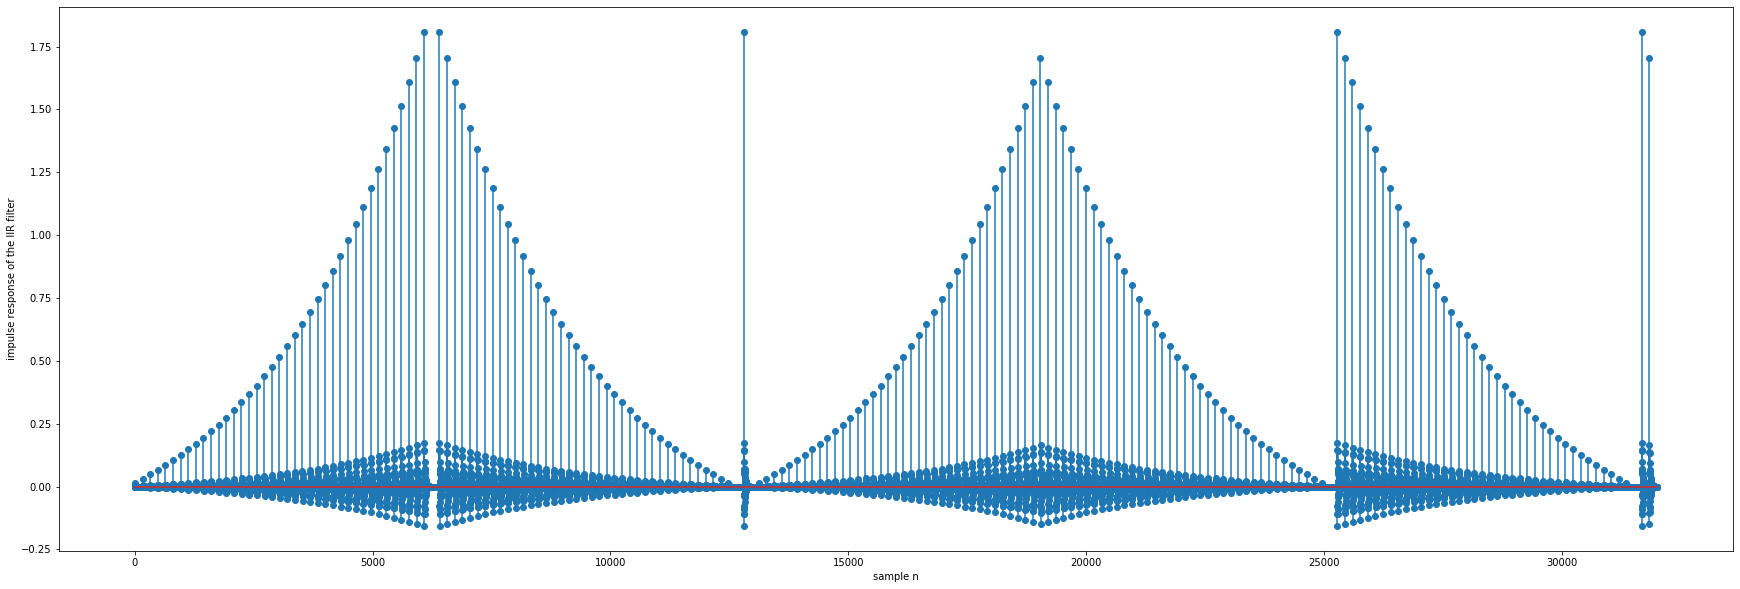

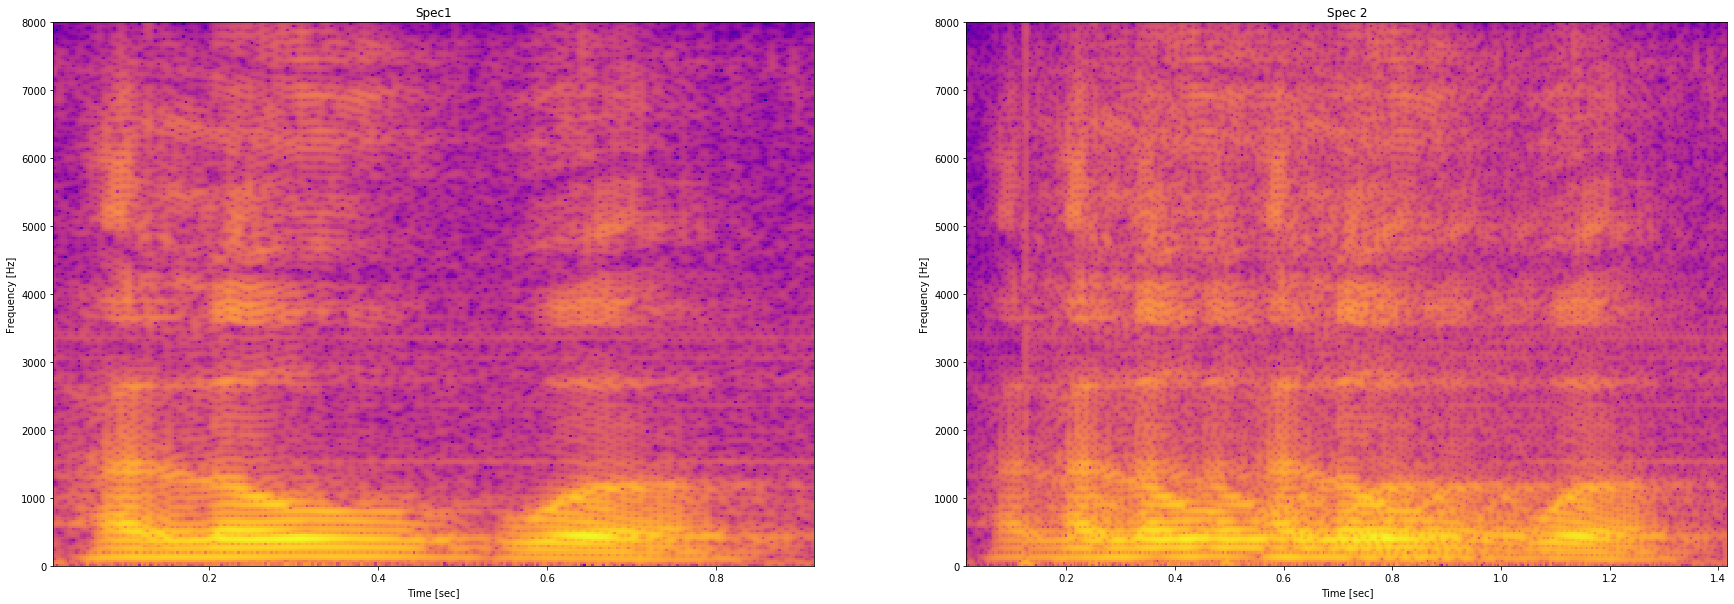

In [15]:
impulseH_2 = np.zeros(32000)
count = 1
temp= 1
for i in range(0,32000,160):
    impulseH_2[i] = (np.exp((count%40)/20)-1)*0.3
    if temp < 40 or (temp > 80 and temp < 120):
        count+=1
    else:
        count-=1
    temp +=1
    #print((count,temp),end='')

plot_Impulse_Response(impulseH_2)
before_after(impulseH_1,original_y)

## 4.

#### a.

In [16]:
h1n = [0.06523, 0.14936,0.21529,0.2402,0.21529,0.14936,0.06523]
h2n = [-0.06523, -0.14936,-0.21529,0.7598,-0.21529,-0.14936,-0.06523]

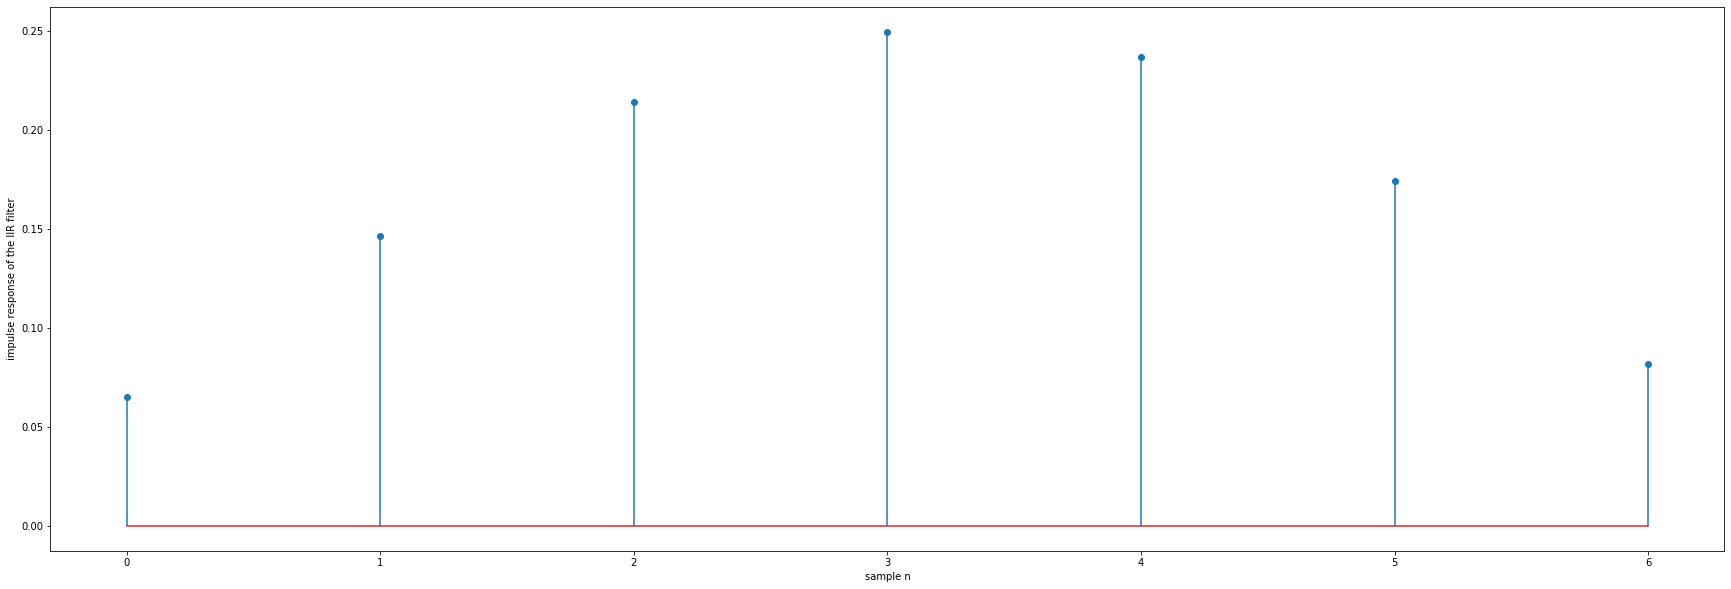

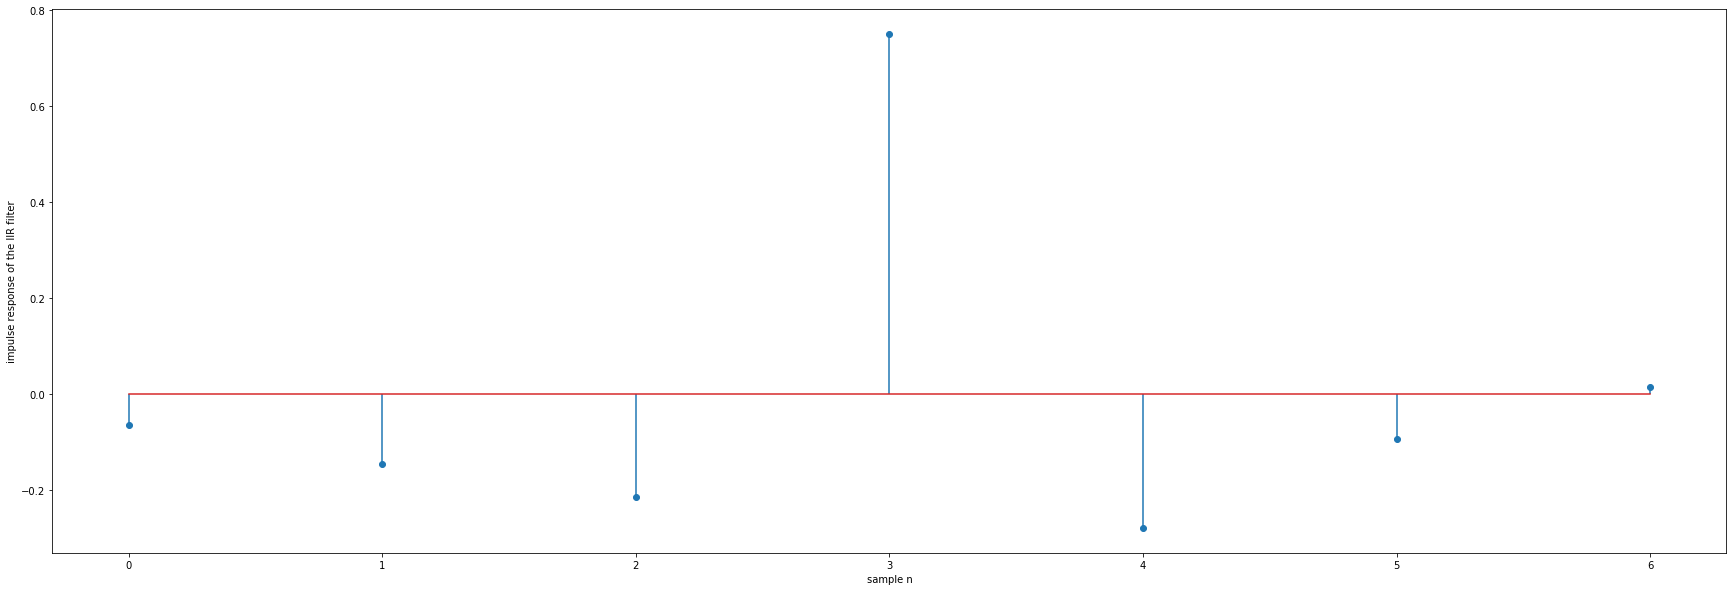

In [17]:
plot_Impulse_Response(h1n)
plot_Impulse_Response(h2n)

#### b.

In [18]:
n = [0 for _ in range(15)]+[1] + [0 for _ in range(14)] + [-2] + [0 for _ in range(14)]

In [19]:
val_y =np.convolve(n,h1n,'full')
pred_y=custom_convolve(n,h1n,'full')
print("NP CONVOLVE",val_y)
print("CUSTOM FUNC",pred_y)

NP CONVOLVE [ 0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.06523
  0.14936  0.21529  0.2402   0.21529  0.14936  0.06523  0.       0.
  0.       0.       0.       0.       0.       0.      -0.13046 -0.29872
 -0.43058 -0.4804  -0.43058 -0.29872 -0.13046  0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.     ]
CUSTOM FUNC [ 0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.06523
  0.14936  0.21529  0.2402   0.21529  0.14936  0.06523  0.       0.
  0.       0.       0.       0.       0.       0.      -0.13046 -0.29872
 -0.43058 -0.4804  -0.43058 -0.29872 -0.13046  0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.     ]


In [20]:
val_y =np.convolve(n,h2n,'valid')
pred_y=custom_convolve(n,h2n)
print("NP CONVOLVE",val_y)
print("CUSTOM FUNC",pred_y)

NP CONVOLVE [ 0.       0.       0.       0.       0.       0.       0.       0.
  0.      -0.06523 -0.14936 -0.21529  0.7598  -0.21529 -0.14936 -0.06523
  0.       0.       0.       0.       0.       0.       0.       0.
  0.13046  0.29872  0.43058 -1.5196   0.43058  0.29872  0.13046  0.
  0.       0.       0.       0.       0.       0.       0.     ]
CUSTOM FUNC [ 0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.      -0.06523
 -0.14936 -0.21529  0.7598  -0.21529 -0.14936 -0.06523  0.       0.
  0.       0.       0.       0.       0.       0.       0.13046  0.29872
  0.43058 -1.5196   0.43058  0.29872  0.13046  0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.     ]


It is the same as the addition of H(n) and a -2 scaled, 15 timestep delayed version of H(n)
In other word, if we treat x_n as an LTI and H(n) as aninput through it, we can tell why

In [21]:
def GenSampledSinusoid(A=1,Freq=1000,Phi=0, Fs=16000,sTime=0,eTime=1):
    n = np.arange(sTime,eTime,1.0/Fs)                       #arange does not include end value 
    y = A*np.cos(2 * np.pi * Freq * n + Phi)
    return (n,y)

In [22]:
n,sin1 = GenSampledSinusoid(0.1,700,0,16000)
_,sin2 = GenSampledSinusoid(0.1,3333,0,16000)
sinful = sin1+sin2

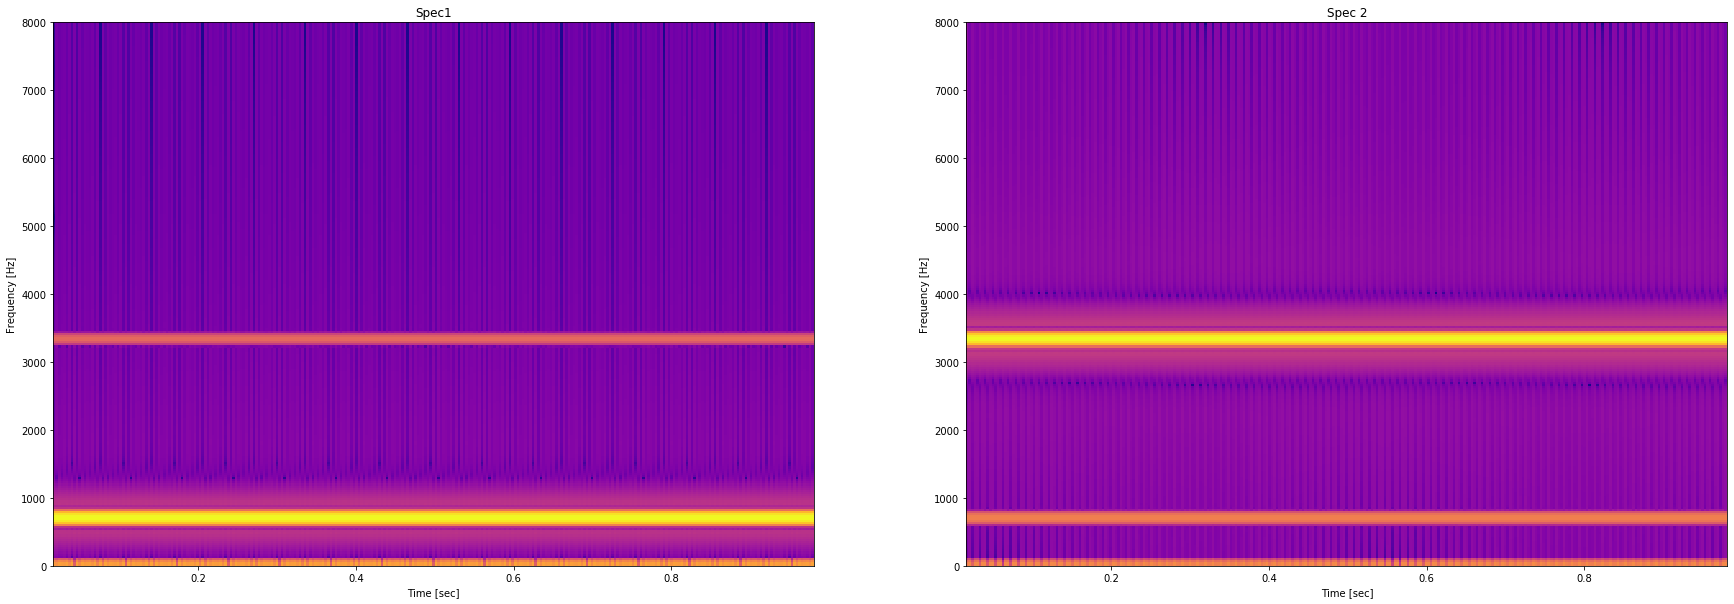

In [23]:
Y_h1= np.convolve(h1n,sinful)
Y_h2= np.convolve(h2n,sinful)
Fs = 16000
compare_two_spec(Y_h1,Y_h2)

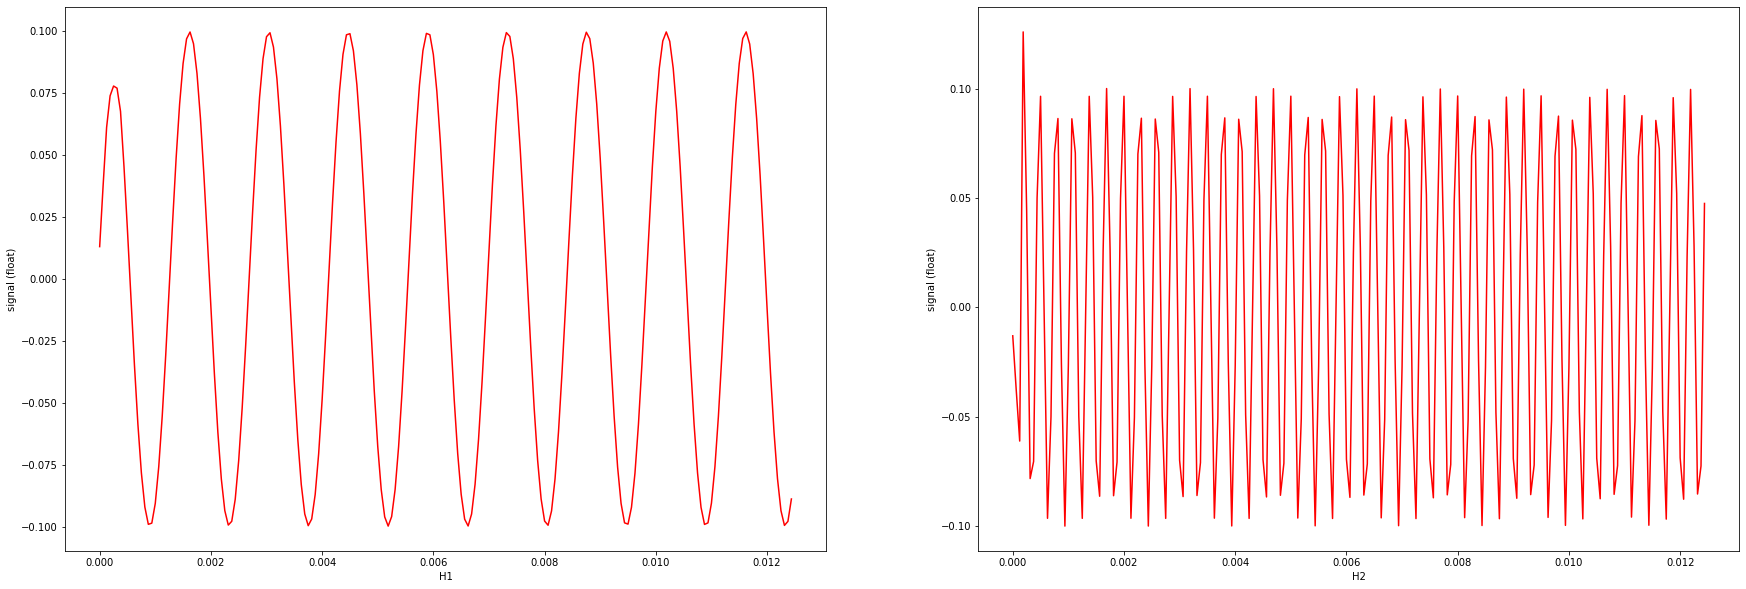

In [24]:
plt.figure(figsize=(30,10))
n_points=200
Fs=16000  
zoom = np.arange(0,0+n_points/Fs,1/Fs)
plt.subplot(121)
plt.plot(zoom,Y_h1[0:n_points],'r')
plt.ylabel('signal (float)')
plt.xlabel('H1')

plt.subplot(122)
plt.plot(zoom,Y_h2[0:n_points],'r')
plt.ylabel('signal (float)')
plt.xlabel('H2')
plt.show()

In [25]:
### Dont' need to listen one

"""It's a filter """

"It's a filter "

## 5.

In [26]:
#Play the sound
input_wav_5 = "helloWorld_noisy_16bit.wav"
winsound.PlaySound(input_wav_5, winsound.SND_FILENAME)

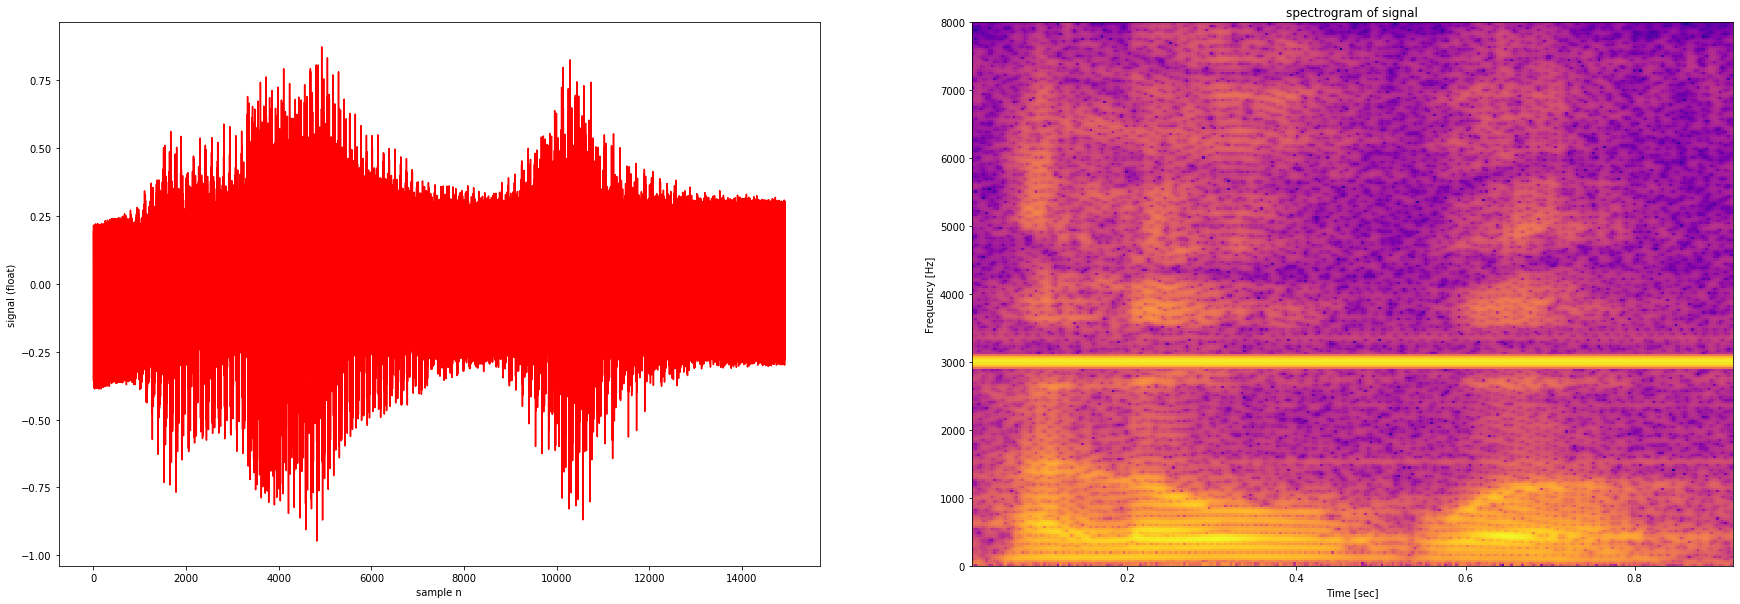

In [28]:
plot_signal_and_spec(input_wav_5)

In [32]:
#### Sample notch filter
def clean(y,f0,Fs=16000):
    # Design notch filter using Dr CES coefficients 
    #b,a = np.array([1, -0.7653668, 0.99999]),np.array([1, -0.722744, 0.888622])
    b,a = np.array([-1, 0.7653668, -0.99999]),np.array([1, -0.722744, 0.888622])
    y_clean = signal.lfilter(b,a, y)
    return y_clean

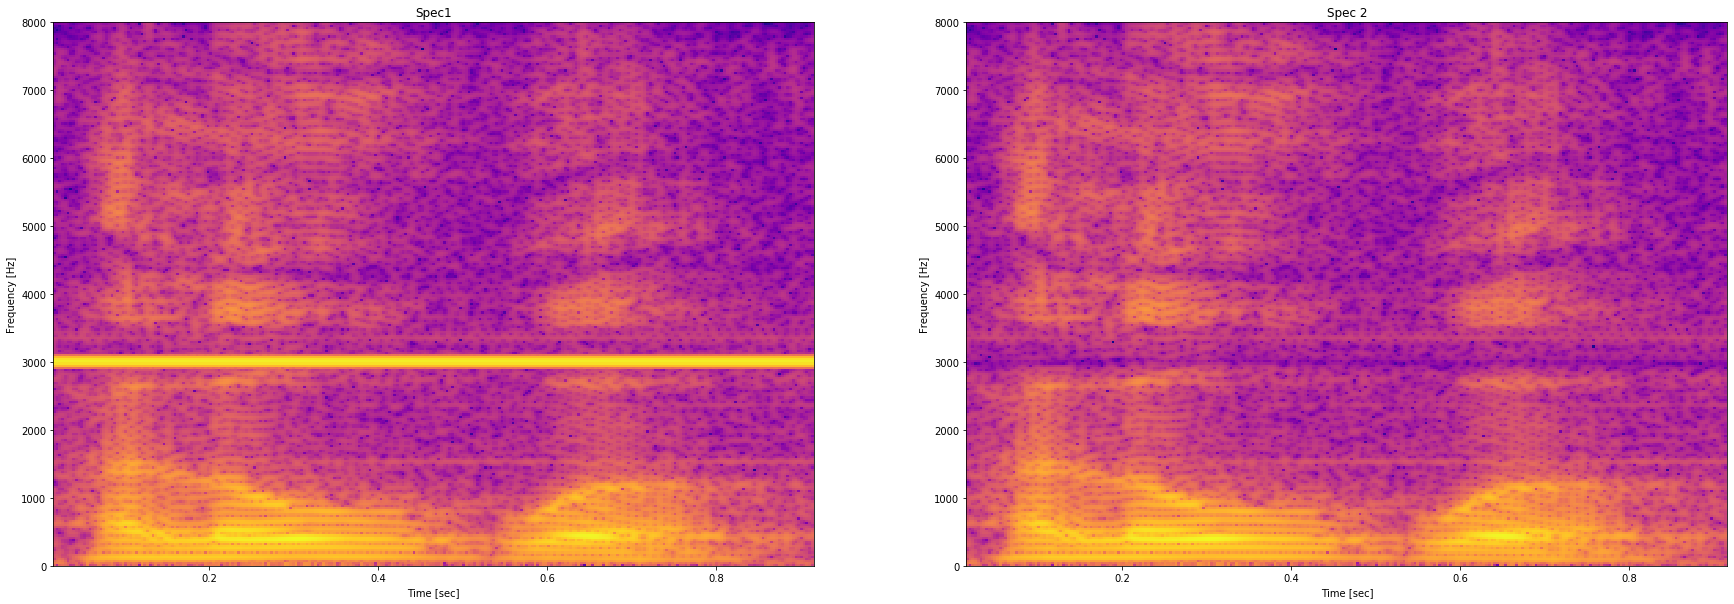

In [33]:
[Fs,y_noisy]= extract_data_from_wav(input_wav_5) 
y_clean = clean(y_noisy,3000,Fs=16000)
compare_two_spec(y_noisy,y_clean)
playSoundFromWav(y_noisy)
playSoundFromWav(y_clean)

In [35]:
from scipy.signal import butter

In [37]:
def bandpass(fs,lowcut,highcut,order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b,a

In [46]:
def unclean(y,f0,Fs=16000):
    # Design notch filter using Dr CES coefficients 
    #b,a = np.array([1, -0.7653668, 0.99999]),np.array([1, -0.722744, 0.888622])
    b,a = bandpass(Fs,3000*0.99,3000*1.01,6)
    y_unclean = signal.lfilter(b,a, y)
    return y_unclean

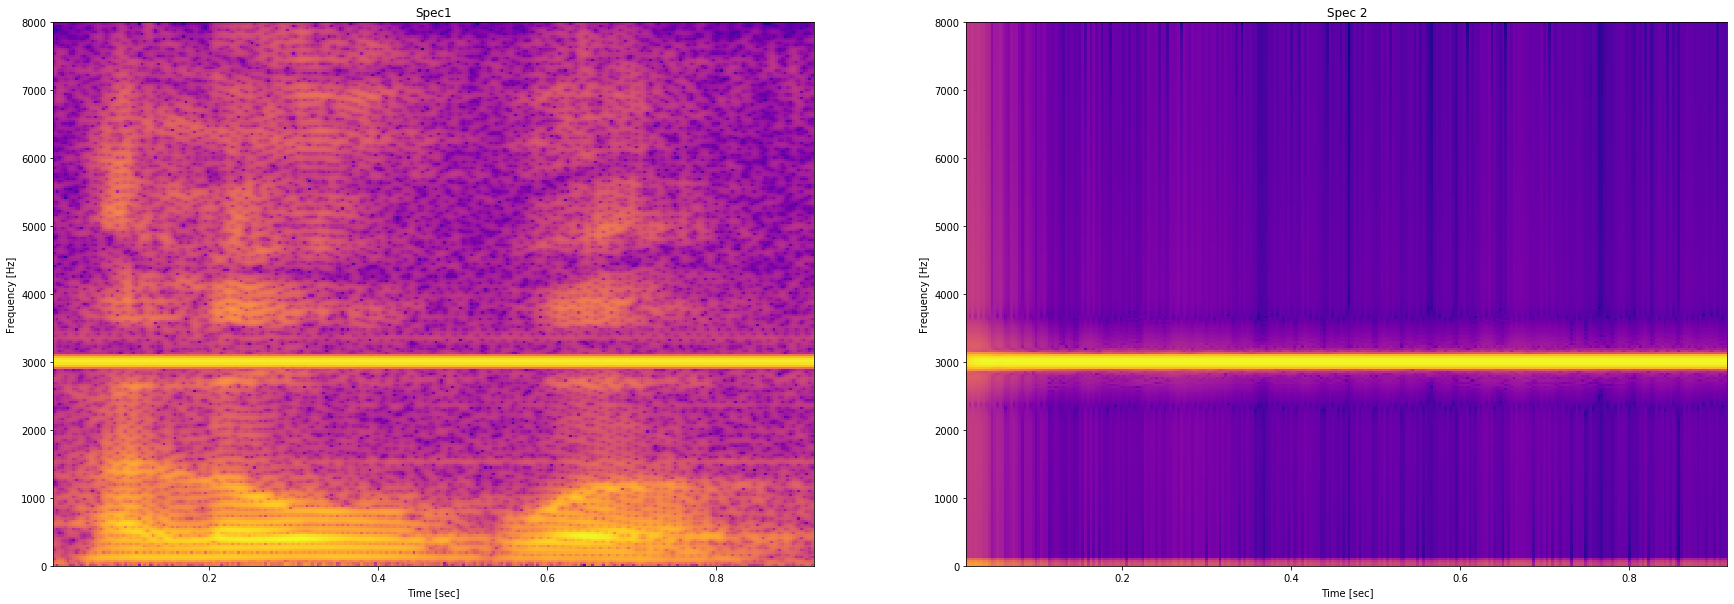

In [48]:

y_unclean = unclean(y_noisy,3000,Fs=16000)
compare_two_spec(y_noisy,y_unclean)
#playSoundFromWav(y_noisy)
playSoundFromWav(y_unclean)